In [1]:
import os
os.chdir('C:\\Users\\91963\\Desktop\\Models_Worked\\Practice Problem_ HR Analytics')
print(os.getcwd())

C:\Users\91963\Desktop\Models_Worked\Practice Problem_ HR Analytics


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train_data=pd.read_csv('traindata.csv')
df_test_data= pd.read_csv('testdata.csv')

In [4]:
df_train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
print(df_train_data.shape)
print(df_test_data.shape)

(54808, 14)
(23490, 13)


In [6]:
df_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
df_train_data.describe

<bound method NDFrame.describe of        employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_training

In [8]:
#Heavy Missing Values 

In [9]:
#NA values more than 30% 
df_train_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [10]:
NA_columns=df_train_data.isnull().sum()
NA_col_3P=NA_columns[NA_columns.values> 0.3*len(df_train_data)]
NA_col_3P

Series([], dtype: int64)

In [11]:
#if you find any columns apply it
#%matplotlib inline
#plt.figure(figsize=(10,2))
#NA_col_3P.plot(kind='bar')
#plt.title('Features with more than 30 percent NA values')
#plt.show()

In [12]:
to_drop_3P=NA_col_3P.index
df_train_data_miss=df_train_data.drop(to_drop_3P,axis=1)

In [13]:
df_train_data=df_train_data_miss

In [14]:
df_train_data.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [15]:
print(f'department: {df_train_data.department.unique()}')
print(f'region: {df_train_data.region.unique()}')
print(f'education: {df_train_data.education.unique()}')
print(f'gender: {df_train_data.gender.unique()}')
print(f'recruitment_channel: {df_train_data.recruitment_channel.unique()}')
print(f'no_of_trainings: {df_train_data.no_of_trainings.unique()}')
print(f'previous_year_rating: {df_train_data.previous_year_rating.unique()}')
#print(f'KPIs_met >80%: {df_train_data.KPIs_met >80%.unique()}')
#print(f'awards_won?: {df_train_data.awards_won?.unique()}')

department: ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region: ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education: ["Master's & above" "Bachelor's" nan 'Below Secondary']
gender: ['f' 'm']
recruitment_channel: ['sourcing' 'other' 'referred']
no_of_trainings: [ 1  2  3  4  7  5  6  8 10  9]
previous_year_rating: [ 5.  3.  1.  4. nan  2.]


In [16]:
df_train_data['KPIs_met >80%'].value_counts()

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

In [17]:
df_train_data['awards_won?'].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

In [18]:
df_train_data['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [19]:
df_train_data['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64


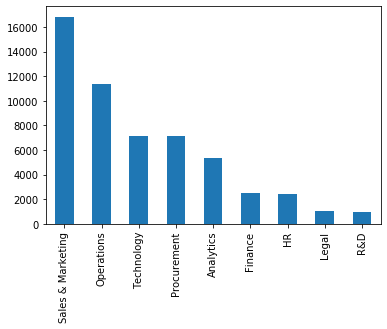

In [20]:
department_status_count = df_train_data['department'].value_counts()
print(department_status_count)
department_status_count.plot.bar()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64


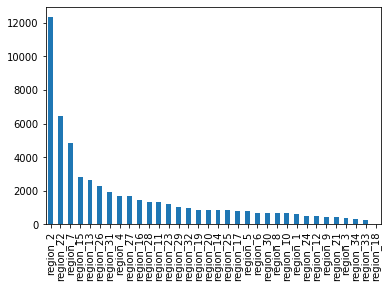

In [21]:
gender_status_count = df_train_data['region'].value_counts()
print(gender_status_count)
gender_status_count.plot.bar()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64


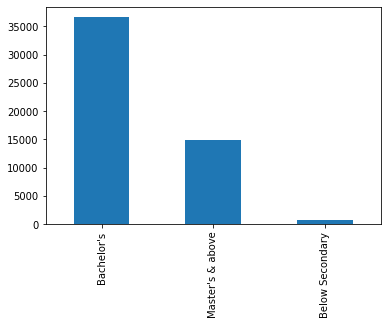

In [22]:
gender_status_count = df_train_data['education'].value_counts()
print(gender_status_count)
gender_status_count.plot.bar()

m    38496
f    16312
Name: gender, dtype: int64


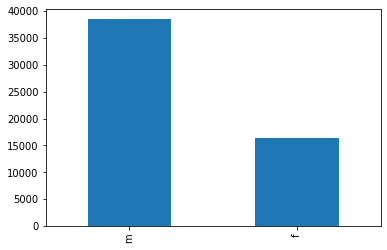

In [23]:
gender_status_count = df_train_data['gender'].value_counts()
print(gender_status_count)
gender_status_count.plot.bar()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64


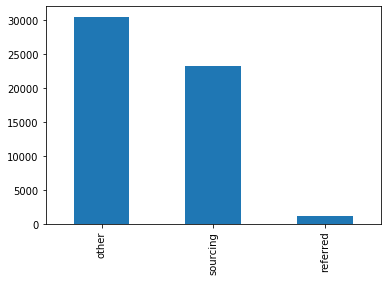

In [24]:
gender_status_count = df_train_data['recruitment_channel'].value_counts()
print(gender_status_count)
gender_status_count.plot.bar()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64


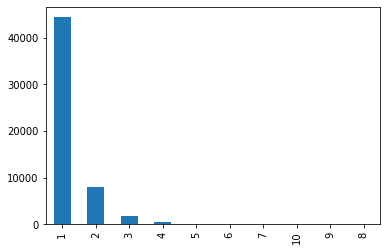

In [25]:
gender_status_count = df_train_data['no_of_trainings'].value_counts()
print(gender_status_count)
gender_status_count.plot.bar()

In [26]:
df_train_data['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

In [27]:
df_test_data['no_of_trainings'].value_counts()

1    18928
2     3544
3      755
4      190
5       36
6       24
7        9
9        2
8        2
Name: no_of_trainings, dtype: int64

In [28]:
# combine the training numbers which are less observations
df_train_data['no_of_trainings']=df_train_data['no_of_trainings'].astype(int)
df_train_data.loc[df_train_data['no_of_trainings']>5,'no_of_trainings']='6_10'
df_train_data['no_of_trainings'].value_counts()

1       44378
2        7987
3        1776
4         468
5         128
6_10       71
Name: no_of_trainings, dtype: int64

In [29]:
df_test_data['no_of_trainings']=df_test_data['no_of_trainings'].astype(int)
df_test_data.loc[df_test_data['no_of_trainings']>5,'no_of_trainings']='6_10'
df_test_data['no_of_trainings'].value_counts()

1       18928
2        3544
3         755
4         190
6_10       37
5          36
Name: no_of_trainings, dtype: int64

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64


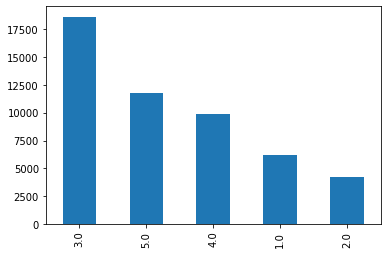

In [30]:
gender_status_count = df_train_data['previous_year_rating'].value_counts()
print(gender_status_count)
gender_status_count.plot.bar()

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64


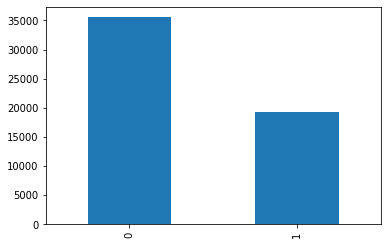

In [31]:
gender_status_count = df_train_data['KPIs_met >80%'].value_counts()
print(gender_status_count)
gender_status_count.plot.bar()

0    53538
1     1270
Name: awards_won?, dtype: int64


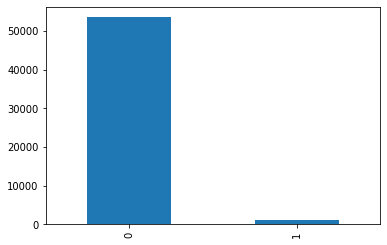

In [32]:
gender_status_count = df_train_data['awards_won?'].value_counts()
print(gender_status_count)
gender_status_count.plot.bar()

0    50140
1     4668
Name: is_promoted, dtype: int64


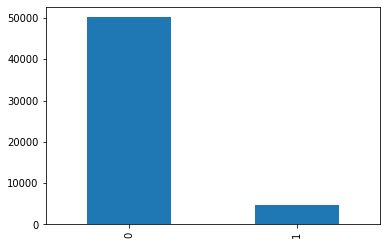

In [33]:
gender_status_count = df_train_data['is_promoted'].value_counts()
print(gender_status_count)
gender_status_count.plot.bar()

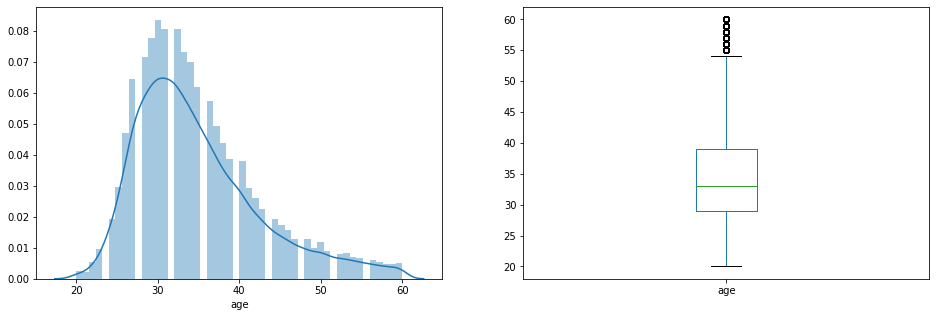

In [34]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_train_data['age']);

plt.subplot(122)
df_train_data['age'].plot.box(figsize=(16,5))

plt.show()

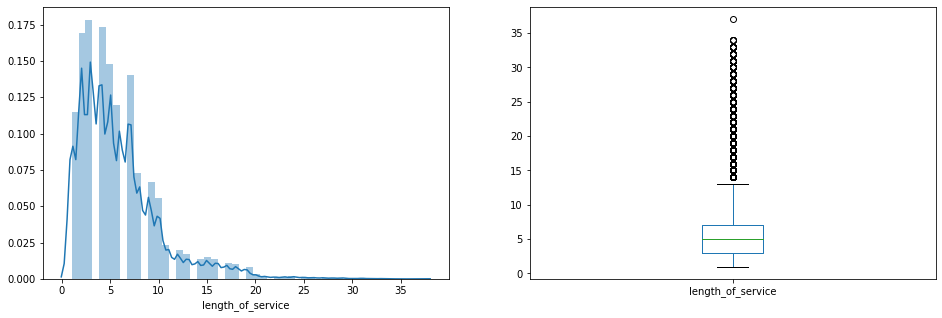

In [35]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_train_data['length_of_service']);

plt.subplot(122)
df_train_data['length_of_service'].plot.box(figsize=(16,5))

plt.show()

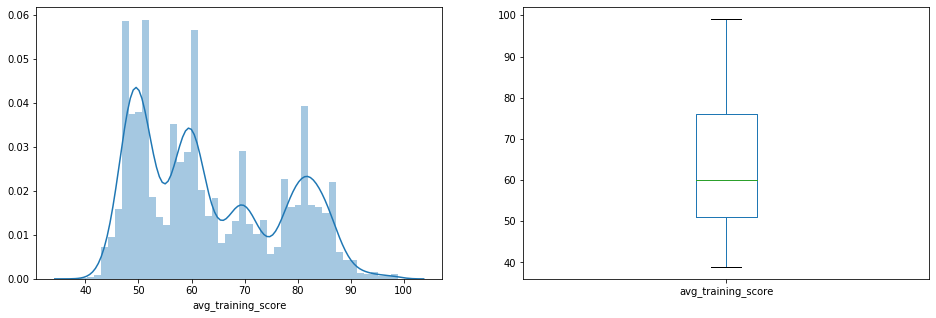

In [36]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_train_data['avg_training_score']);

plt.subplot(122)
df_train_data['avg_training_score'].plot.box(figsize=(16,5))

plt.show()

Text(0.5, 0.98, '')

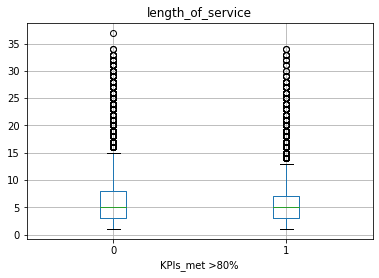

In [37]:
df_train_data.boxplot(column='length_of_service', by='KPIs_met >80%')
# To remove the upper title in box plot
plt.suptitle('')

Text(0.5, 0.98, '')

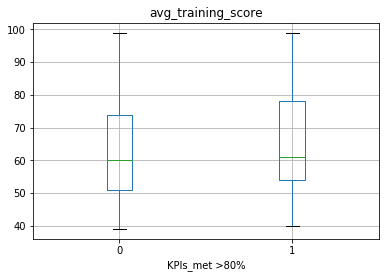

In [38]:
df_train_data.boxplot(column='avg_training_score', by='KPIs_met >80%')
# To remove the upper title in box plot
plt.suptitle('')

is_promoted         0         1
gender                         
f            0.910066  0.089934
m            0.916849  0.083151


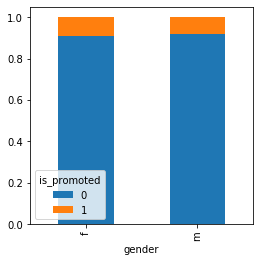

In [39]:
gender_promo = pd.crosstab(df_train_data['gender'],df_train_data['is_promoted'])
# print(Gender)

print(gender_promo.div(gender_promo.sum(axis=1).astype(float), axis=0))
gender_promo.div(gender_promo.sum(axis=1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

is_promoted           0         1
KPIs_met >80%                    
0              0.960413  0.039587
1              0.830906  0.169094


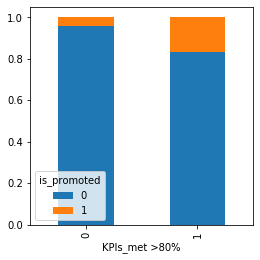

In [40]:
gender_promo = pd.crosstab(df_train_data['KPIs_met >80%'],df_train_data['is_promoted'])
# print(Gender)

print(gender_promo.div(gender_promo.sum(axis=1).astype(float), axis=0))
gender_promo.div(gender_promo.sum(axis=1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

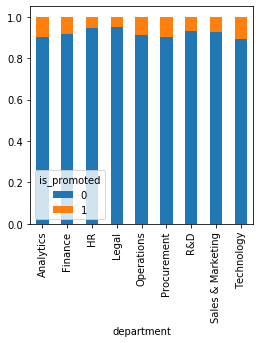

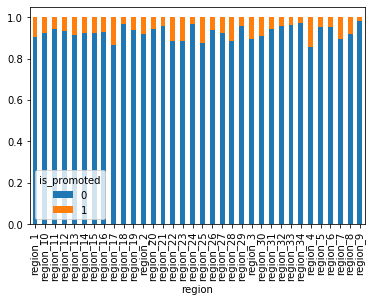

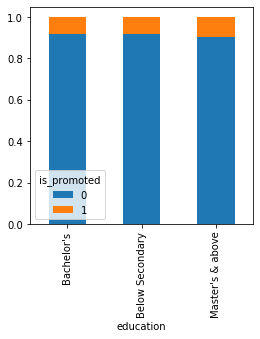

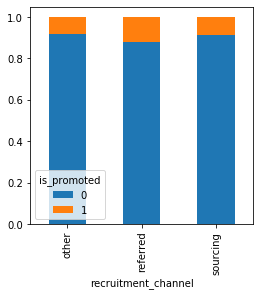

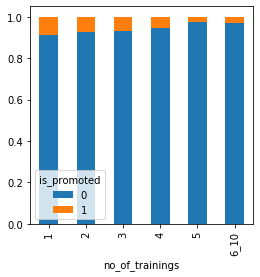

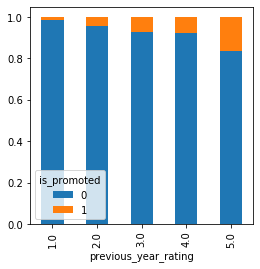

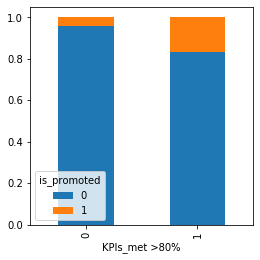

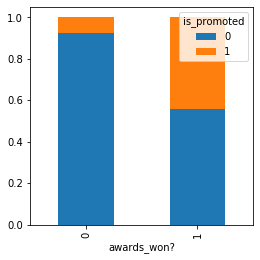

In [41]:
department_promo = pd.crosstab(df_train_data['department'],df_train_data['is_promoted'])
region_promo = pd.crosstab(df_train_data['region'],df_train_data['is_promoted'])
education_promo = pd.crosstab(df_train_data['education'],df_train_data['is_promoted'])
recruitment_channel_promo = pd.crosstab(df_train_data['recruitment_channel'],df_train_data['is_promoted'])
no_of_trainings_promo = pd.crosstab(df_train_data['no_of_trainings'],df_train_data['is_promoted'])
previous_year_rating_promo = pd.crosstab(df_train_data['previous_year_rating'],df_train_data['is_promoted'])
KPIs_met_promo = pd.crosstab(df_train_data['KPIs_met >80%'],df_train_data['is_promoted'])
awards_won_promo = pd.crosstab(df_train_data['awards_won?'],df_train_data['is_promoted'])




department_promo.div(department_promo.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

region_promo.div(region_promo.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

education_promo.div(education_promo.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

recruitment_channel_promo.div(recruitment_channel_promo.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

no_of_trainings_promo.div(no_of_trainings_promo.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

previous_year_rating_promo.div(previous_year_rating_promo.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

KPIs_met_promo.div(KPIs_met_promo.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

awards_won_promo.div(awards_won_promo.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

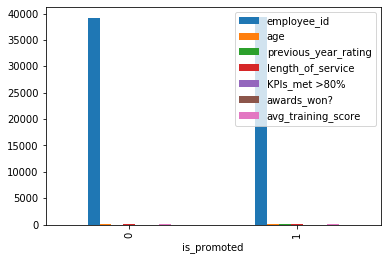

In [42]:
df_train_data.groupby('is_promoted').mean().plot.bar()

In [43]:
df_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  object 
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 5.9+ MB


# Handling Missing Values For Categorical

In [44]:
for col in df_train_data.columns:
    missing_series = df_train_data[col][df_train_data[col].isna() == True]
    if missing_series.size > 0:
        print(col, missing_series.size)

education 2409
previous_year_rating 4124


In [45]:
for col in df_test_data.columns:
    missing_series = df_test_data[col][df_test_data[col].isna() == True]
    if missing_series.size > 0:
        print(col, missing_series.size)

education 1034
previous_year_rating 1812


In [46]:
print(df_train_data['education'].value_counts())
print(df_train_data['previous_year_rating'].value_counts())

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64


In [47]:
print(df_test_data['education'].value_counts())
print(df_test_data['previous_year_rating'].value_counts())

Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64
3.0    7921
5.0    5097
4.0    4249
1.0    2680
2.0    1731
Name: previous_year_rating, dtype: int64


In [48]:
#df_train_data['education']=df_train_data['education'].astype(object)
#df_train_data['previous_year_rating']=df_train_data['previous_year_rating'].astype(object)

In [49]:
categ_cols = ['education', 'previous_year_rating']
for col in categ_cols:
    df_train_data[col] = df_train_data[col].fillna(df_train_data[col].mode()[0])
    df_test_data[col] = df_test_data[col].fillna(df_test_data[col].mode()[0])

In [50]:
print(df_train_data['education'].mode())
print(df_test_data['education'].mode())

0    Bachelor's
dtype: object
0    Bachelor's
dtype: object


In [51]:
print(df_train_data['previous_year_rating'].mode())
print(df_test_data['previous_year_rating'].mode())

0    3.0
dtype: float64
0    3.0
dtype: float64


# Outlier Finding

In [52]:
df_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  object 
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 5.9+ MB


In [53]:
#outliers for the Quantitative Variables

In [54]:
print(np.percentile(df_train_data.loc[:,'age'], [75,92,93,95,96,97,98,99,100]))
print(np.percentile(df_train_data.loc[:,'age'], [0.001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]))

[39. 47. 48. 51. 52. 54. 56. 58. 60.]
[20. 20. 20. 21. 22. 22. 22. 22. 22.]


In [55]:
print(np.percentile(df_test_data.loc[:,'age'], [75,92,93,95,96,97,98,99,100]))
print(np.percentile(df_test_data.loc[:,'age'], [0.001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]))

[39. 48. 49. 51. 52. 54. 56. 58. 60.]
[20.    20.    20.    21.    22.    22.    22.    22.    22.912]


In [56]:
print(np.percentile(df_train_data.loc[:,'length_of_service'], [75,92,93,95,96,97,98,99,99.8,100]))
print(np.percentile(df_train_data.loc[:,'length_of_service'], [0.001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]))

[ 7. 12. 13. 15. 16. 17. 18. 20. 28. 37.]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [57]:
print(np.percentile(df_test_data.loc[:,'length_of_service'], [75,92,93,95,96,97,98,99,99.8,100]))
print(np.percentile(df_test_data.loc[:,'length_of_service'], [0.001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]))

[ 7. 12. 13. 15. 16. 17. 18. 20. 27. 34.]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [58]:
print(np.percentile(df_train_data.loc[:,'avg_training_score'], [75,92,93,95,96,97,98,99,99.7,100]))
print(np.percentile(df_train_data.loc[:,'avg_training_score'], [0.001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]))

[76. 84. 85. 86. 86. 87. 88. 91. 96. 99.]
[39. 42. 43. 43. 43. 44. 44. 44. 44.]


In [59]:
print(np.percentile(df_test_data.loc[:,'avg_training_score'], [75,92,93,95,96,97,98,99,99.7,100]))
print(np.percentile(df_test_data.loc[:,'avg_training_score'], [0.001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]))

[76. 84. 85. 86. 86. 87. 88. 91. 96. 99.]
[39.23489 42.      43.      43.      43.      44.      44.      44.
 44.     ]


# Outlier Correction

In [60]:
df_train_data.loc[df_train_data['avg_training_score']>28,'avg_training_score']=28 
df_test_data.loc[df_test_data['avg_training_score']>28,'avg_training_score']=28

df_train_data.loc[df_train_data['avg_training_score']<39,'avg_training_score']=39
df_test_data.loc[df_test_data['avg_training_score']<39,'avg_training_score']=39

In [61]:
df_train_data.describe()

,employee_id,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.0,54808.000000
mean,39195.830627,34.803915,3.304481,5.865512,0.351974,0.023172,39.0,0.085170
std,22586.581449,7.660169,1.214770,4.265094,0.477590,0.150450,0.0,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.0,0.000000
25%,19669.750000,29.000000,3.000000,3.000000,0.000000,0.000000,39.0,0.000000
50%,39225.500000,33.000000,3.000000,5.000000,0.000000,0.000000,39.0,0.000000
75%,58730.500000,39.000000,4.000000,7.000000,1.000000,0.000000,39.0,0.000000
max,78298.000000,60.000000,5.000000,37.000000,1.000000,1.000000,39.0,1.000000


In [62]:
df_test_data.describe()

,employee_id,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.0
mean,39041.399149,34.782929,3.312984,5.810387,0.358834,0.022776,39.0
std,22640.809201,7.679492,1.216959,4.207917,0.479668,0.149191,0.0
min,3.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.0
25%,19370.250000,29.000000,3.000000,3.000000,0.000000,0.000000,39.0
50%,38963.500000,33.000000,3.000000,5.000000,0.000000,0.000000,39.0
75%,58690.000000,39.000000,4.000000,7.000000,1.000000,0.000000,39.0
max,78295.000000,60.000000,5.000000,34.000000,1.000000,1.000000,39.0


In [63]:
df_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  object 
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 5.9+ MB


In [64]:
df_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             23490 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  object 
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 2.3+ MB


In [65]:
df_train_data['previous_year_rating']=df_train_data['previous_year_rating'].astype(object)
df_test_data['previous_year_rating']=df_test_data['previous_year_rating'].astype(object)

In [66]:
df_test_data['previous_year_rating']=df_test_data['previous_year_rating'].astype(object)

# Creating Dummy Variable

In [67]:
#Here By seeing the data set we can guess that ID and Region wonn't be help ful 

In [68]:
dummy_cols = ['department', 'education', 'gender', 'recruitment_channel','no_of_trainings', 'previous_year_rating', 'KPIs_met >80%', 'awards_won?']
train_dummies = pd.get_dummies(df_train_data[dummy_cols], drop_first = True)
test_dummies = pd.get_dummies(df_test_data[dummy_cols], drop_first = True)

In [69]:
train_dummies.head()

,KPIs_met >80%,awards_won?,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,...,recruitment_channel_sourcing,no_of_trainings_2,no_of_trainings_3,no_of_trainings_4,no_of_trainings_5,no_of_trainings_6_10,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0
0,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [70]:
num_cols = ['age', 'length_of_service', 'avg_training_score']

# If no normalization needed:
df_train_num = df_train_data[num_cols]
df_test_num = df_test_data[num_cols]

#df_train_num = (df_train_data[num_cols] - df_train_data[num_cols].mean()) / df_train_data[num_cols].std()
#df_test_num = (df_test_data[num_cols] - df_train_data[num_cols].mean()) / df_train_data[num_cols].std()

In [71]:
#set loan status to 1 if approved, else 0  if Yes or No in the y
#is_promoted_status = df_train_data.is_promoted_status.apply(lambda x: 0 if x == 'N' else 1)

is_promoted=df_train_data['is_promoted']

In [72]:
df_train = pd.concat([df_train_num, train_dummies, is_promoted], axis =1)
df_test = pd.concat([df_test_num, test_dummies], axis =1)

# Missing value imputation for Numerical Var

In [73]:
df_train.isnull().sum()

age                             0
length_of_service               0
avg_training_score              0
KPIs_met >80%                   0
awards_won?                     0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
education_Below Secondary       0
education_Master's & above      0
gender_m                        0
recruitment_channel_referred    0
recruitment_channel_sourcing    0
no_of_trainings_2               0
no_of_trainings_3               0
no_of_trainings_4               0
no_of_trainings_5               0
no_of_trainings_6_10            0
previous_year_rating_2.0        0
previous_year_rating_3.0        0
previous_year_rating_4.0        0
previous_year_rating_5.0        0
is_promoted                     0
dtype: int64

In [74]:
df_test.isnull().sum()

age                             0
length_of_service               0
avg_training_score              0
KPIs_met >80%                   0
awards_won?                     0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
education_Below Secondary       0
education_Master's & above      0
gender_m                        0
recruitment_channel_referred    0
recruitment_channel_sourcing    0
no_of_trainings_2               0
no_of_trainings_3               0
no_of_trainings_4               0
no_of_trainings_5               0
no_of_trainings_6_10            0
previous_year_rating_2.0        0
previous_year_rating_3.0        0
previous_year_rating_4.0        0
previous_year_rating_5.0        0
dtype: int64

In [75]:
#create dataframes with numerical missing values with median imputed 
df_train_fill_median = df_train.fillna(df_train.median())
df_test_fill_median = df_test.fillna(df_test.median())
df_train_fill_median.head()

,age,length_of_service,avg_training_score,KPIs_met >80%,awards_won?,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,...,no_of_trainings_2,no_of_trainings_3,no_of_trainings_4,no_of_trainings_5,no_of_trainings_6_10,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,is_promoted
0,35,8,39,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,30,4,39,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,34,7,39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,39,10,39,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,45,2,39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [76]:
print(df_train_fill_median.isnull().sum())
print(df_test_fill_median.isnull().sum())

age                             0
length_of_service               0
avg_training_score              0
KPIs_met >80%                   0
awards_won?                     0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
education_Below Secondary       0
education_Master's & above      0
gender_m                        0
recruitment_channel_referred    0
recruitment_channel_sourcing    0
no_of_trainings_2               0
no_of_trainings_3               0
no_of_trainings_4               0
no_of_trainings_5               0
no_of_trainings_6_10            0
previous_year_rating_2.0        0
previous_year_rating_3.0        0
previous_year_rating_4.0        0
previous_year_rating_5.0        0
is_promoted                     0
dtype: int64
age                             0
l

# Scatter plot for Numerical Independent Variables

C:\Users\91963\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 39.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\91963\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 39.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\91963\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 39.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


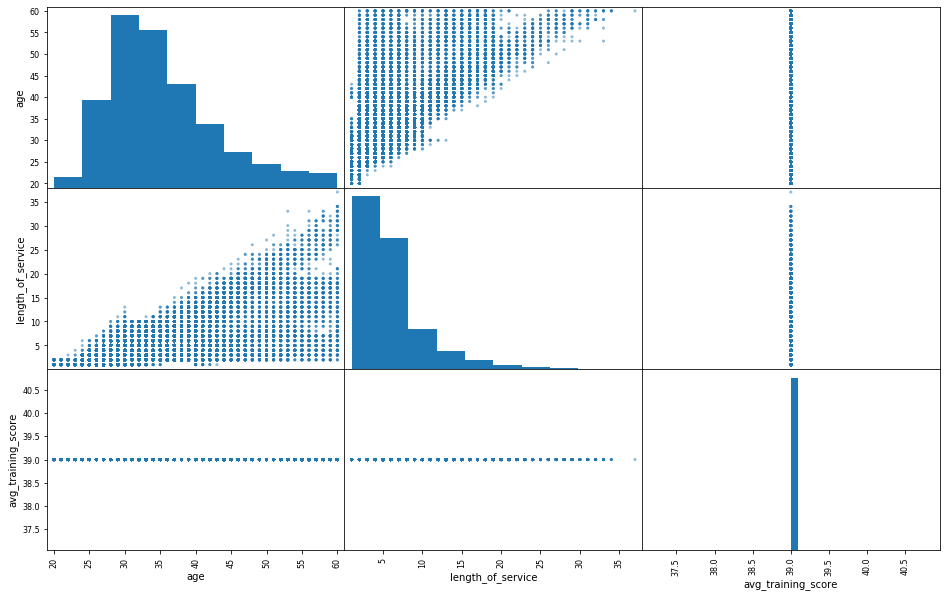

In [77]:
pd.plotting.scatter_matrix(df_train_num, figsize = (16, 10))
plt.show()

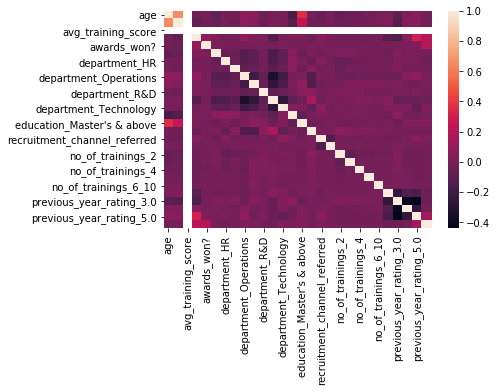

In [78]:
#Correlation heat Map
corr= df_train_fill_median.corr()
sns.heatmap(corr)

In [79]:
#Removing the Not Required column by General Guess
#we can done it while concating and doing dummy variables

In [80]:
#not_required_columns=['employee_id','region'] # region because it has more unique items and keeping it wont be significant

In [81]:
#full_data_train=df_train_fill_median.drop(not_required_columns,axis=1)
#full_data_test=df_test_fill_median.drop(not_required_columns,axis=1)
#print(full_data_train.shape)
#print(full_data_test.shape)

# Model parameter Tuning and selection

In [82]:
# Split the data into X-train , y-train , x-test , y-test

In [83]:
from sklearn.model_selection import train_test_split
columns = df_train_fill_median.drop('is_promoted',axis =1).columns
X_train, X_test, y_train, y_test = train_test_split(df_train_fill_median[columns], 
                                                    df_train_fill_median.is_promoted, test_size = .2)

In [84]:
models_scores=[]

In [85]:
# First we are working on Random Forest to identify the significant variables by finding RF values

In [86]:
# import required modules

# 1) Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [88]:
# Choosing the optimal parameter for the classifier                     

param_grid = [{'max_depth':[2,3,4,6]}]

scorer={'recall_score': make_scorer(recall_score)}

RF = RandomForestClassifier(random_state = 123,n_estimators=100,criterion='entropy',class_weight='balanced',max_features='sqrt')
RF_GS=GridSearchCV(RF,param_grid=param_grid,scoring=scorer,refit='recall_score',cv=3,n_jobs=-1)
RF_GS.fit(X_train,y_train)  
RF_GS.best_params_

{'max_depth': 3}

# RF model 1

In [89]:
RF_1 = RandomForestClassifier(random_state = 123,n_estimators=100,criterion='entropy',class_weight='balanced',max_depth=4,max_features='sqrt')
RF_1.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, max_features='sqrt', random_state=123)

In [90]:
#Now we check for X_test and see the accuracy

y_pred_RF_1=RF_1.predict(X_test )
metrics.recall_score(y_test, y_pred_RF_1)

0.8395560040363269

In [91]:
# Check for the confusion metrics

confusion_matrix_RF_1=metrics.confusion_matrix(y_test, y_pred_RF_1)
confusion_matrix_RF_1

array([[6354, 3617],
       [ 159,  832]], dtype=int64)

In [92]:
# Check for th e train set

y_pred_train_RF_1=RF_1.predict(X_train)
metrics.recall_score(y_train, y_pred_train_RF_1 )

0.8373674190916508

In [93]:
Var_Importance_train_RF= pd.Series(data=RF_1.feature_importances_,index=X_train.columns,name='variables')
print(Var_Importance_train_RF)
Var_Importance_test_RF= pd.Series(data=RF_1.feature_importances_,index=df_test_fill_median.columns,name='variables')
print(Var_Importance_test_RF)

age                             0.014620
length_of_service               0.008334
avg_training_score              0.000000
KPIs_met >80%                   0.454084
awards_won?                     0.205924
department_Finance              0.000973
department_HR                   0.005365
department_Legal                0.001390
department_Operations           0.003435
department_Procurement          0.002154
department_R&D                  0.000418
department_Sales & Marketing    0.013905
department_Technology           0.016019
education_Below Secondary       0.000454
education_Master's & above      0.006286
gender_m                        0.000895
recruitment_channel_referred    0.003549
recruitment_channel_sourcing    0.000877
no_of_trainings_2               0.002440
no_of_trainings_3               0.000905
no_of_trainings_4               0.001632
no_of_trainings_5               0.002155
no_of_trainings_6_10            0.000155
previous_year_rating_2.0        0.018551
previous_year_ra

In [94]:
# Dropping the less important variables considering rf factor

least_imp_var=Var_Importance_train_RF[Var_Importance_train_RF.values < 0.005].index
X_train_1=X_train.drop(least_imp_var,axis=1).copy()
X_test_1=X_test.drop(least_imp_var,axis=1).copy()

least_imp_var_test=Var_Importance_test_RF[Var_Importance_test_RF.values < 0.005].index
df_test_fill_median_1=df_test_fill_median.drop(least_imp_var,axis=1).copy()

# RF Model 2 with important variables

In [95]:
RF_2 = RandomForestClassifier(random_state = 123,n_estimators=100,criterion='entropy',class_weight='balanced',max_depth=5,max_features='sqrt')
RF_2.fit(X_train_1,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features='sqrt', random_state=123)

In [96]:
#Now we check for X_test and see the accuracy

y_pred_RF_2=RF_2.predict(X_test_1 )
metrics.recall_score(y_test, y_pred_RF_2)

0.8375378405650857

In [97]:
# Check for the confusion metrics
    
confusion_matrix_RF_2=metrics.confusion_matrix(y_test, y_pred_RF_2)
confusion_matrix_RF_2

array([[6382, 3589],
       [ 161,  830]], dtype=int64)

In [98]:
Var_Importance_train_RF_2= pd.Series(data=RF_2.feature_importances_,index=X_train_1.columns,name='variables')
print(Var_Importance_train_RF_2)
Var_Importance_test_RF_2= pd.Series(data=RF_2.feature_importances_,index=df_test_fill_median_1.columns,name='variables')
print(Var_Importance_test_RF_2)

age                             0.021135
length_of_service               0.016887
KPIs_met >80%                   0.507194
awards_won?                     0.178080
department_HR                   0.003144
department_Sales & Marketing    0.014663
department_Technology           0.013785
education_Master's & above      0.006157
previous_year_rating_2.0        0.013191
previous_year_rating_3.0        0.016372
previous_year_rating_4.0        0.014189
previous_year_rating_5.0        0.195201
Name: variables, dtype: float64
age                             0.021135
length_of_service               0.016887
KPIs_met >80%                   0.507194
awards_won?                     0.178080
department_HR                   0.003144
department_Sales & Marketing    0.014663
department_Technology           0.013785
education_Master's & above      0.006157
previous_year_rating_2.0        0.013191
previous_year_rating_3.0        0.016372
previous_year_rating_4.0        0.014189
previous_year_rating_5.0 

In [99]:
# Dropping the less important variables considering rf factor

least_imp_var_2=Var_Importance_train_RF_2[Var_Importance_train_RF_2.values < 0.01].index
X_train_2=X_train_1.drop(least_imp_var_2,axis=1).copy()
X_test_2=X_test_1.drop(least_imp_var_2,axis=1).copy()

least_imp_var_test_2=Var_Importance_test_RF_2[Var_Importance_test_RF_2.values < 0.01].index
df_test_fill_median_2=df_test_fill_median_1.drop(least_imp_var_2,axis=1).copy()

# RF Model 3 with important varoables

In [100]:
RF_3 = RandomForestClassifier(random_state = 123,n_estimators=100,criterion='entropy',class_weight='balanced',max_depth=5,max_features='sqrt')
RF_3.fit(X_train_2,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features='sqrt', random_state=123)

In [101]:
#Now we check for X_test and see the accuracy

y_pred_RF_3=RF_3.predict(X_test_2 )
metrics.recall_score(y_test, y_pred_RF_3)

0.8395560040363269

In [102]:
# Check for the confusion metrics

confusion_matrix_RF_3=metrics.confusion_matrix(y_test, y_pred_RF_3)
confusion_matrix_RF_3

array([[6349, 3622],
       [ 159,  832]], dtype=int64)

In [103]:
models_scores.append(('RandomForest', (metrics.recall_score(y_test, y_pred_RF_3))))

In [104]:
Var_Importance_train_RF_3= pd.Series(data=RF_3.feature_importances_,index=X_train_2.columns,name='variables')
print(Var_Importance_train_RF_3)
Var_Importance_test_RF_3= pd.Series(data=RF_3.feature_importances_,index=df_test_fill_median_2.columns,name='variables')
print(Var_Importance_test_RF_3)

age                             0.020962
length_of_service               0.016376
KPIs_met >80%                   0.496400
awards_won?                     0.178879
department_Sales & Marketing    0.015212
department_Technology           0.017138
previous_year_rating_2.0        0.017122
previous_year_rating_3.0        0.022914
previous_year_rating_4.0        0.017848
previous_year_rating_5.0        0.197149
Name: variables, dtype: float64
age                             0.020962
length_of_service               0.016376
KPIs_met >80%                   0.496400
awards_won?                     0.178879
department_Sales & Marketing    0.015212
department_Technology           0.017138
previous_year_rating_2.0        0.017122
previous_year_rating_3.0        0.022914
previous_year_rating_4.0        0.017848
previous_year_rating_5.0        0.197149
Name: variables, dtype: float64


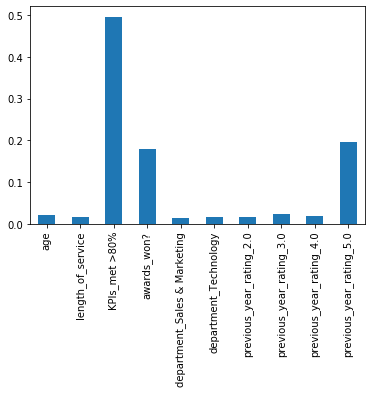

In [105]:
%matplotlib inline
Var_Importance_train_RF_3.plot(kind='bar')

In [107]:
# save the important predictors in the csv file

Var_Importance_train_RF_3.to_csv('important_predictors_RF_1.csv')

# Rnadom forest final model for General test set file

In [108]:
RF_final_model=RF_3.predict(df_test_fill_median_2)

In [109]:
RF_final_model

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

# 2) Decision Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier
GS = DecisionTreeClassifier(random_state=123,class_weight='balanced',max_features='sqrt')

In [111]:
# grid search to the optimal parameter

param_grid = [{'max_depth': [2,3,4,5,6]}]
scorer={'recall_score': make_scorer(recall_score)}
Gsearch=GridSearchCV(GS,param_grid=param_grid,scoring=scorer,refit='recall_score',cv=3)
GS_Model = Gsearch.fit(X_train_2,y_train)
GS_Model.best_score_
GS_Model.best_params_

{'max_depth': 5}

In [112]:
# Model with max depth =5

DT = DecisionTreeClassifier(random_state=123,class_weight='balanced',max_depth=5,max_features='sqrt')
DT_1 = DT.fit(X_train_2, y_train)

In [113]:
# Prediction on testset

y_pred_DT_1 = DT_1.predict(X_test_2)
metrics.recall_score(y_test, y_pred_DT_1)

0.8304742684157417

In [114]:
models_scores.append(('DecisionTree', (metrics.recall_score(y_test, y_pred_DT_1))))

In [115]:
# Lets see the Prediction on train set

X_train_2_pred = DT_1.predict(X_train_2)
metrics.recall_score(y_train,X_train_2_pred)

0.8305683981506663

In [116]:
# Confusion matrix for the Decision Tree Classifier

Confusion_Mat_test_DT_1 = confusion_matrix(y_test, y_pred_DT_1)
Confusion_Mat_test_DT_1

array([[6343, 3628],
       [ 168,  823]], dtype=int64)

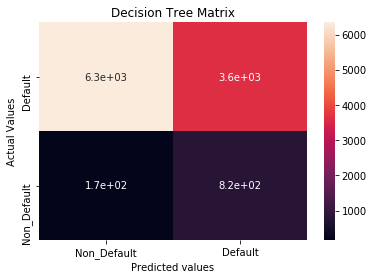

In [117]:
%matplotlib inline
import seaborn as sns
ax=plt.subplot()
sns.heatmap(Confusion_Mat_test_DT_1,annot=True,ax=ax);
# labels, title
ax.set_xlabel('Predicted values');ax.set_ylabel('Actual Values');ax.set_title('Decision Tree Matrix')
ax.xaxis.set_ticklabels(['Non_Default','Default']);ax.yaxis.set_ticklabels(['Default','Non_Default']);

# Decision Tree final model for General test set file

In [118]:
DT_final_model=DT_1.predict(df_test_fill_median_2)

In [119]:
DT_final_model

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

# 3) Logistic Regression

In [120]:
# Multi collinearity check using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

for i in range(X_train_2.shape[1]):
    temp_vif=variance_inflation_factor(X_train_2.values,i)
    print(X_train_2.columns[i],": ",temp_vif)

age :  13.59075767436981
length_of_service :  4.607545080651695
KPIs_met >80% :  1.7995129963726848
awards_won? :  1.0343201245379643
department_Sales & Marketing :  1.5380581256316257
department_Technology :  1.230589082566638
previous_year_rating_2.0 :  1.5014443348053044
previous_year_rating_3.0 :  3.6718534391732196
previous_year_rating_4.0 :  2.2713042140929387
previous_year_rating_5.0 :  2.7288686151595876


In [121]:
# if you observe the above output, all the variables are having less than 10 VIF. So we need not to remove any columns.
# In case of more than 10 VIF we need to drop the column having more than 10

In [122]:
from sklearn.linear_model import LogisticRegression   

Log_Reg = LogisticRegression(class_weight='balanced')
Log_Reg_1=Log_Reg.fit(X_train_2, y_train)

In [123]:
# Check the score on test set

y_pred_Log_Reg_1=Log_Reg_1.predict(X_test_2)
metrics.recall_score(y_test, y_pred_Log_Reg_1)

0.7426841574167508

In [124]:
models_scores.append(('LogisticRegression', (metrics.recall_score(y_test, y_pred_Log_Reg_1))))

In [125]:
Confusion_Mat_Log_Reg_1 = confusion_matrix(y_test, y_pred_Log_Reg_1)
Confusion_Mat_Log_Reg_1

array([[6918, 3053],
       [ 255,  736]], dtype=int64)

In [126]:
metrics.precision_score(y_test, y_pred_Log_Reg_1)

0.1942465030351016

In [127]:
y_test_pred_prob=Log_Reg_1.predict_proba(X_test_2)[:, 1]
y_test_pred_prob

array([0.2054636 , 0.62154027, 0.27781017, ..., 0.07620274, 0.25586   ,
       0.62586774])

Text(0, 0.5, 'Frequency')

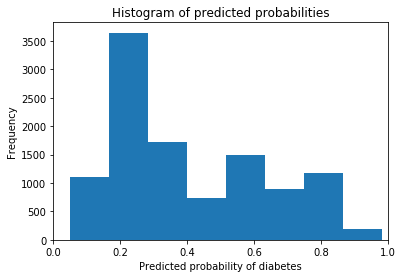

In [128]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_test_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [129]:
# if you observe the above graph there is a lot of deff bw the groups , so default cutoff 0.5 can be changed to 0.4 

In [130]:
# predict promoted if the predicted probability is greater than 0.3

from sklearn.preprocessing import binarize

# it will return 1 for all values above 0.3 and 0 otherwise
# results are 2D so we slice out the first column

y_pred_Log_Reg_1_class_new = binarize(np.atleast_2d(y_test_pred_prob), 0.4)[0]

C:\Users\91963\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [131]:
#adjusted probability classes
y_pred_Log_Reg_1_class_new[0:10]

array([0., 1., 0., 0., 0., 0., 0., 1., 1., 0.])

In [132]:
#default probability classes 
Log_Reg_1.predict(X_test_2)[0:10]

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [133]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_Log_Reg_1_class_new))

[[6310 3661]
 [ 171  820]]


In [134]:
print(metrics.recall_score(y_test, y_pred_Log_Reg_1_class_new))

0.82744702320888


In [135]:
models_scores.append(('LogisticRegression New class', (metrics.recall_score(y_test, y_pred_Log_Reg_1_class_new))))

In [136]:
#previous confusion matrix
Confusion_Mat_Log_Reg_1

array([[6918, 3053],
       [ 255,  736]], dtype=int64)

In [137]:
y_test_pred_prob=Log_Reg_1.predict_proba(X_test_2)[0:10]
y_test_pred_prob

array([[0.7945364 , 0.2054636 ],
       [0.37845973, 0.62154027],
       [0.72218983, 0.27781017],
       [0.7182103 , 0.2817897 ],
       [0.79958611, 0.20041389],
       [0.73533165, 0.26466835],
       [0.71525932, 0.28474068],
       [0.39579425, 0.60420575],
       [0.37036628, 0.62963372],
       [0.92132884, 0.07867116]])

In [138]:
y_test_pred_prob=Log_Reg_1.predict_proba(X_test_2)
y_test_pred_prob

array([[0.7945364 , 0.2054636 ],
       [0.37845973, 0.62154027],
       [0.72218983, 0.27781017],
       ...,
       [0.92379726, 0.07620274],
       [0.74414   , 0.25586   ],
       [0.37413226, 0.62586774]])

Text(0, 0.5, 'Frequency')

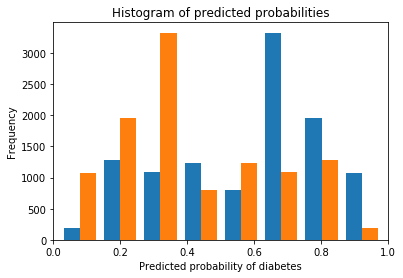

In [139]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_test_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

# ROC Curve

In [140]:
y_test.head()

32996    0
27392    0
40837    0
3983     0
41026    0
Name: is_promoted, dtype: int64

In [141]:
y_test_pred_prob[0:10]

array([[0.7945364 , 0.2054636 ],
       [0.37845973, 0.62154027],
       [0.72218983, 0.27781017],
       [0.7182103 , 0.2817897 ],
       [0.79958611, 0.20041389],
       [0.73533165, 0.26466835],
       [0.71525932, 0.28474068],
       [0.39579425, 0.60420575],
       [0.37036628, 0.62963372],
       [0.92132884, 0.07867116]])

In [142]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_prob[:, 1])

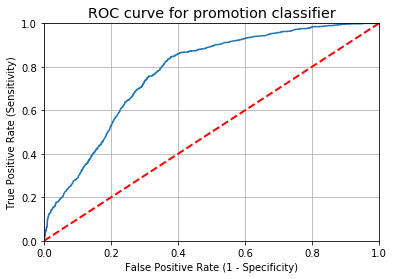

In [143]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('ROC curve for promotion classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [144]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_test_pred_prob[:, 1])

In [145]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [146]:
# AUC is the percentage of the ROC plot that is underneath the curve
# AUC is useful as a single number summary of classifier performance
# Higher value = better classifier
# AUC is useful even when there is high class imbalance (unlike classification accuracy)

# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_test_pred_prob[:, 1]))

0.7727433269903506


In [147]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(Log_Reg_1, X_train_2, y_train, cv=10, scoring='roc_auc').mean()

C:\Users\91963\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\91963\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [148]:
cross_val

0.7712261276205077

In [149]:
f1 = metrics.f1_score(y_test, y_pred_Log_Reg_1)
print(f1)

0.3079497907949791


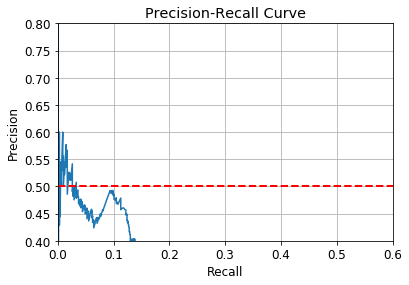

In [150]:
plt.plot(recall, precision)
plt.xlim([0.0, 0.6])
plt.ylim([0.4, 0.8])
plt.rcParams['font.size'] = 12
##Random FPR and TPR
plt.plot([0, 1], [0.5, 0.5], color='red', lw=2, linestyle='--')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

In [151]:
# With the precision-recall curve, the closer it is to the top-right corner, 
  # the better the algorithm. And hence a larger area under the curve (AUC) 
  # indicates that the algorithm has higher recall and higher precision.
# This area under the curve is called "Average Precision"
print(metrics.average_precision_score(y_test, y_test_pred_prob[:, 1]))

0.24365864802870585


# Logistic Regression final model for General test set file

In [152]:
Log_Reg_final_model=Log_Reg_1.predict(df_test_fill_median_2)
Log_Reg_final_model

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [153]:
Log_Reg_1.predict(df_test_fill_median_2)[0:10]

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [154]:
df_test_pred_prob=Log_Reg_1.predict_proba(df_test_fill_median_2)[0:10]
df_test_pred_prob

array([[0.28041613, 0.71958387],
       [0.72560179, 0.27439821],
       [0.9158668 , 0.0841332 ],
       [0.78518824, 0.21481176],
       [0.7350126 , 0.2649874 ],
       [0.76037855, 0.23962145],
       [0.25530314, 0.74469686],
       [0.75536614, 0.24463386],
       [0.71601393, 0.28398607],
       [0.17780204, 0.82219796]])

In [155]:
df_test_pred_prob=Log_Reg_1.predict_proba(df_test_fill_median_2)[:, 1]
df_test_pred_prob

array([0.71958387, 0.27439821, 0.0841332 , ..., 0.26466835, 0.26867102,
       0.80097631])

Text(0, 0.5, 'Frequency')

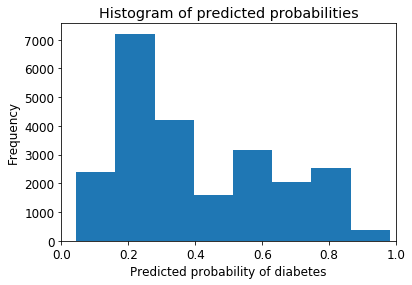

In [156]:
# histogram of predicted probabilities

# 8 bins
plt.hist(df_test_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [157]:
# So Final Selection of the model based on the score

In [158]:
models_scores

[('RandomForest', 0.8395560040363269),
 ('DecisionTree', 0.8304742684157417),
 ('LogisticRegression', 0.7426841574167508),
 ('LogisticRegression New class', 0.82744702320888)]

In [159]:
# Random Forest is giving good scores

In [160]:
RF_3

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features='sqrt', random_state=123)

# Now save the Model

In [161]:
# to save we need to import pickle

import pickle

In [162]:
# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(RF_3, open(filename, 'wb'))

In [163]:
# Save below code in a separate Python file to call it from command line



import os
os.chdir('C:\\Users\\91963\\Desktop\\Models_Worked\\Practice Problem_ HR Analytics')


import pickle
import pandas as pd
df=pd.read_csv('important_predictors_RF.csv', sep=',',header=None)

# load the model from disk
loaded_model = pickle.load(open('finalized_model.pkl', 'rb'))
result = loaded_model.predict(df)
print(result)

ValueError: could not convert string to float: 'age'